# Нормализация

In [82]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install sklearn

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from data_from_previous_practice import get_data, OBJECTS_NUMBER, TEST_SIZE

In [84]:
def draw_graph(clf, data, ident, legends):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    x_lim = np.arange(x_min, x_max, .1)
    y_lim = np.arange(y_min, y_max, .1)

    xx, yy = np.meshgrid(x_lim, y_lim)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)

    scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=70)
    handles = scatter.legend_elements()[0]
    plt.legend(handles, legends)
    plt.show()

# Датасет ирисов Фишера

In [85]:
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

In [86]:
df = pd.DataFrame(x, columns=iris.data.columns)
df.target = y
df.describe()

C:\Users\playe\AppData\Local\Temp\ipykernel_18356\7858541.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = y


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


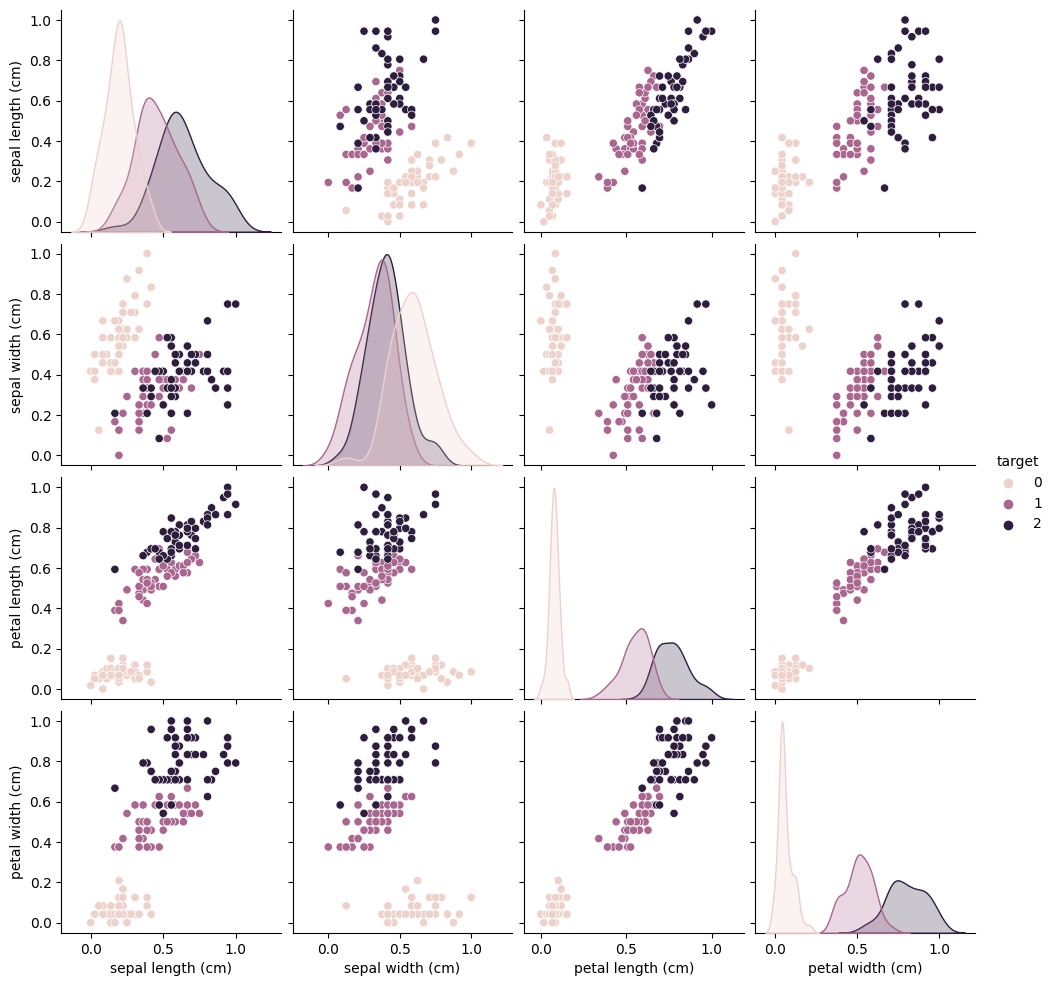

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000
std,0.230018,0.181611,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [87]:
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)

df_scaled = pd.DataFrame(x_scaled, columns=iris.data.columns)
df_scaled['target'] = y
sns.pairplot(df_scaled, hue='target')
plt.show()
df_scaled.describe()

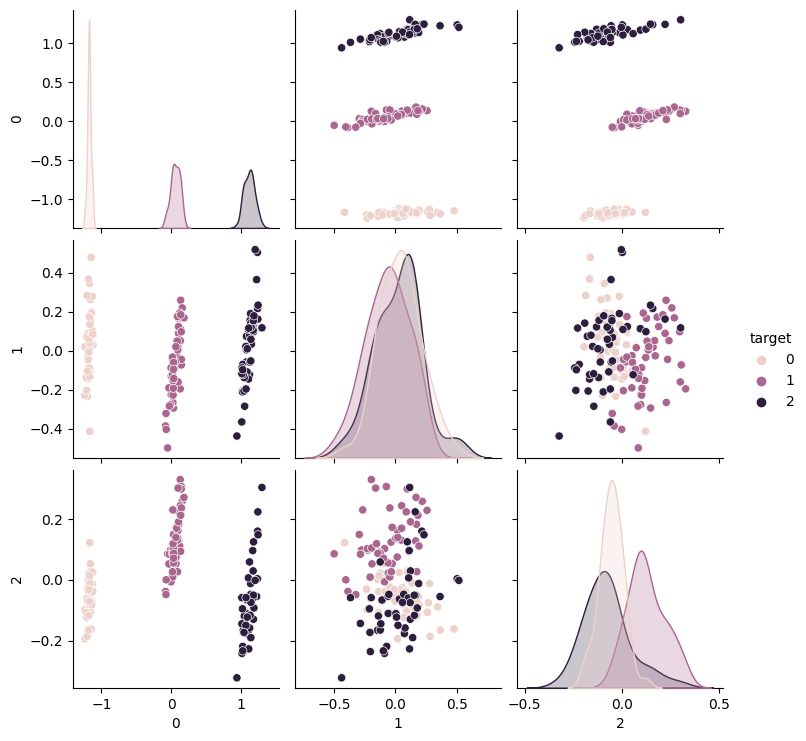

In [95]:
df_in = df_scaled
pca = PCA(n_components=3)
new_x = pca.fit_transform(df_in)
pca_df = pd.DataFrame(new_x)
pca_df['target'] = y
sns.pairplot(pca_df, hue='target')
plt.show()

# 1

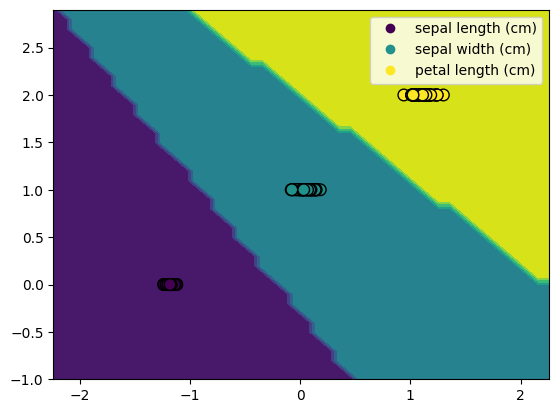

In [96]:
data = np.stack((pca_df[0], pca_df['target']), axis=-1)
ident = np.array(pca_df['target'])

clf = LogisticRegression()

x_train = data[:TEST_SIZE]
x_test = data[TEST_SIZE:]

y_train = ident[:TEST_SIZE]
y_test = ident[TEST_SIZE:]

clf.fit(x_train, y_train)
draw_graph(clf, data, ident, iris.data.columns)

# Рыб

In [90]:
def normilize(df_in):
    data_scaled = preprocessing.MinMaxScaler().fit_transform(data)

    df_data_scaled = pd.DataFrame(
            data_scaled,
            columns=['light','width']
    )
    df_data_scaled['target'] = ident

    df_in = df_data_scaled
    pca = PCA(n_components=1)
    new_x = pca.fit_transform(df_in)
    pca_df = pd.DataFrame(new_x)
    pca_df['target'] = ident

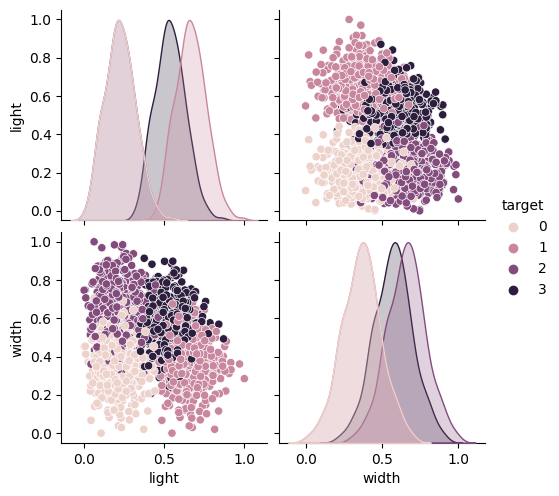

,light,width,target
count,1772.000000,1772.000000,1772.00000
mean,0.411975,0.489817,1.50000
std,0.216370,0.181235,1.11835
min,0.000000,0.000000,0.00000
25%,0.219782,0.354836,0.75000
50%,0.397854,0.485203,1.50000
75%,0.598565,0.622144,2.25000
max,1.000000,1.000000,3.00000


In [91]:
group_1, group_2, group_3, group_4, xx, yy, Z, data, ident, x_train, x_test, y_train, y_test = get_data()

data_scaled = preprocessing.MinMaxScaler().fit_transform(data)

df_data_scaled = pd.DataFrame(
        data_scaled,
        columns=['light','width']
)
df_data_scaled['target'] = ident
sns.pairplot(df_data_scaled, hue='target')
plt.show()
df_data_scaled.describe()

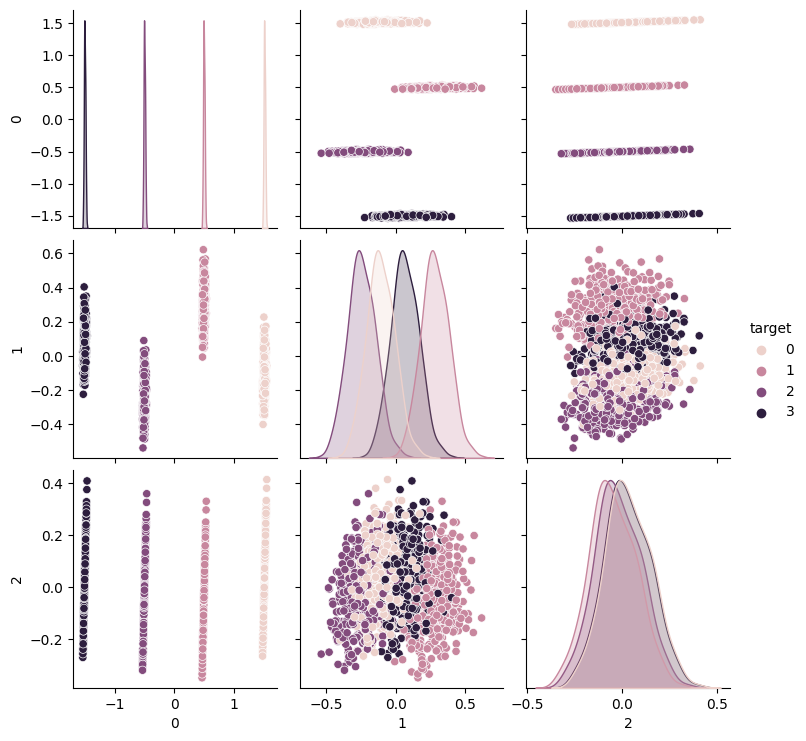

In [92]:
df_in = df_data_scaled
pca = PCA(n_components=3)
new_x = pca.fit_transform(df_in)
pca_df = pd.DataFrame(new_x)
pca_df['target'] = ident
sns.pairplot(pca_df, hue='target')
plt.show()

In [93]:
data = np.stack((pca_df[0], pca_df[1]), axis=-1)

ident = np.array(pca_df['target'])

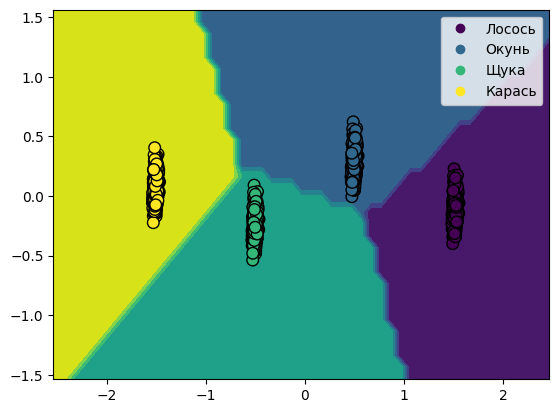

Точность равна - 1.0


In [94]:
clf = LogisticRegression(max_iter=OBJECTS_NUMBER)

x_train = data[:TEST_SIZE]
x_test = data[TEST_SIZE:]

y_train = ident[:TEST_SIZE]
y_test = ident[TEST_SIZE:]

clf.fit(x_train, y_train)
draw_graph(clf, data, ident, ['Лосось','Окунь','Щука','Карась'])

print(f'Точность равна - {accuracy_score(y_test, clf.predict(x_test))}')